In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-gold-price-historical-data/gold.csv


# Load the Data and some minor Cleaning

In [2]:
df = pd.read_csv('/kaggle/input/daily-gold-price-historical-data/gold.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,281.0,281.0,281.0,282.7,4,USD
1,2000-01-05,283.2,283.2,283.2,281.1,16,USD
2,2000-01-06,281.4,281.4,281.4,281.4,0,USD
3,2000-01-07,281.9,281.9,281.9,281.9,0,USD
4,2000-01-10,281.7,281.7,281.7,281.7,0,USD


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000
mean,1051.334064,1055.134048,1047.209294,1061.702755,1691.543113
std,522.375070,524.396437,520.115979,528.987793,10821.666938
min,255.000000,255.000000,255.000000,255.100000,0.000000
25%,462.850000,462.850000,462.150000,462.650000,5.000000
50%,1223.050000,1226.950000,1217.300000,1238.650000,56.000000
75%,1407.475000,1410.975000,1405.300000,1449.375000,243.000000
max,2121.700000,2121.700000,2121.700000,2122.700000,214605.000000


In [5]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Open,High,Low,Close,Volume
Open,1.000000,0.999915,0.999869,0.998742,0.102649
High,0.999915,1.000000,0.999786,0.998698,0.103961
Low,0.999869,0.999786,1.000000,0.998926,0.100907
Close,0.998742,0.998698,0.998926,1.000000,0.099715
Volume,0.102649,0.103961,0.100907,0.099715,1.000000


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df = df.set_index('Date')

In [8]:
df

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-01-04,281.0,281.00,281.0,282.7,4,USD
2000-01-05,283.2,283.20,283.2,281.1,16,USD
2000-01-06,281.4,281.40,281.4,281.4,0,USD
2000-01-07,281.9,281.90,281.9,281.9,0,USD
2000-01-10,281.7,281.70,281.7,281.7,0,USD
...,...,...,...,...,...,...
2022-04-13,1970.5,1985.80,1966.3,1984.7,132029,USD
2022-04-14,1981.6,1984.00,1962.7,1974.9,139424,USD
2022-04-18,1978.5,2003.00,1974.4,1986.4,138130,USD


# Visualization

Text(0.5, 1.0, 'Open and Close Prices')

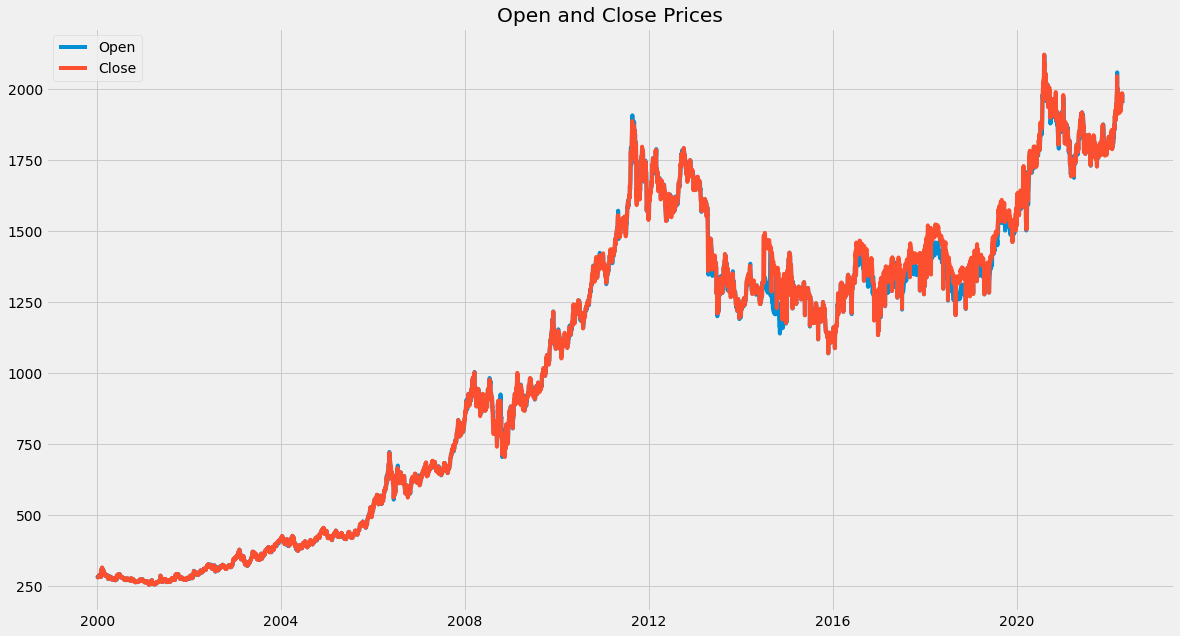

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (18,10))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.legend(['Open','Close'])
plt.title('Open and Close Prices')


Text(0.5, 1.0, 'High and Low Prices of Gold')

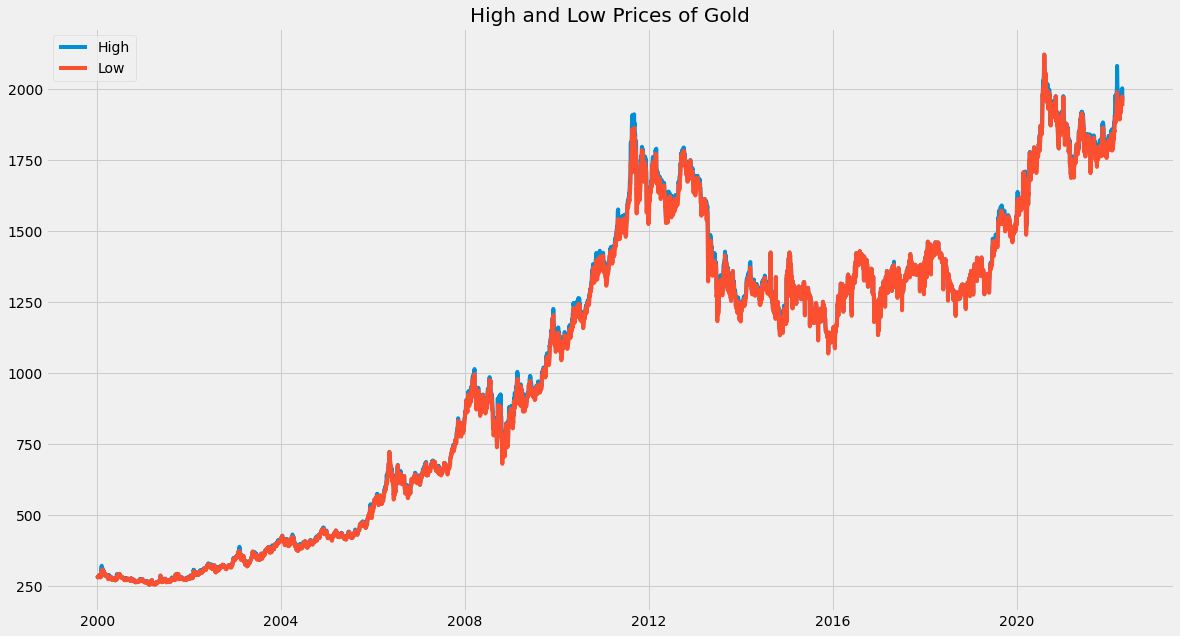

In [10]:
plt.figure(figsize = (18,10))
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend(['High','Low'])
plt.title('High and Low Prices of Gold', fontsize =20)

Text(0.5, 1.0, 'Volume')

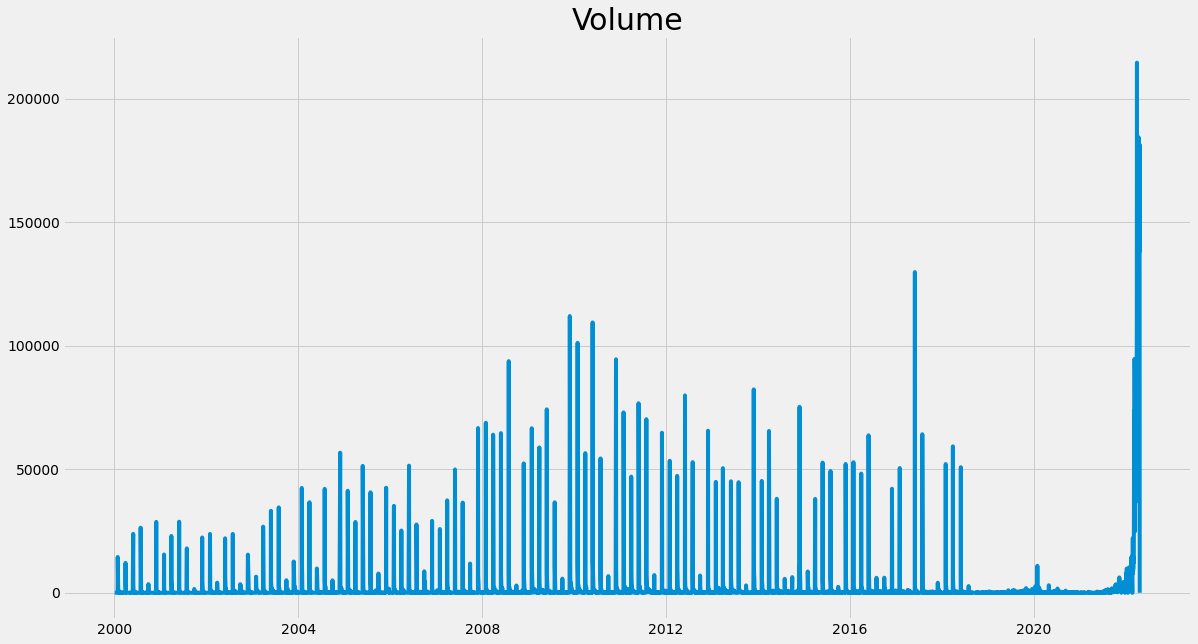

In [11]:
plt.figure(figsize = (18,10))
plt.plot(df['Volume'])
plt.title('Volume', fontsize = 30)

In [12]:
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
df = df.dropna()
print(df['PriceDiff'])

Date
2000-01-04    -1.6
2000-01-05     0.3
2000-01-06     0.5
2000-01-07    -0.2
2000-01-10     1.7
              ... 
2022-04-12     8.6
2022-04-13    -9.8
2022-04-14    11.5
2022-04-18   -27.4
2022-04-19    -2.7
Name: PriceDiff, Length: 5705, dtype: float64


Text(0.5, 1.0, 'Price Difference and Close Price of Gold')

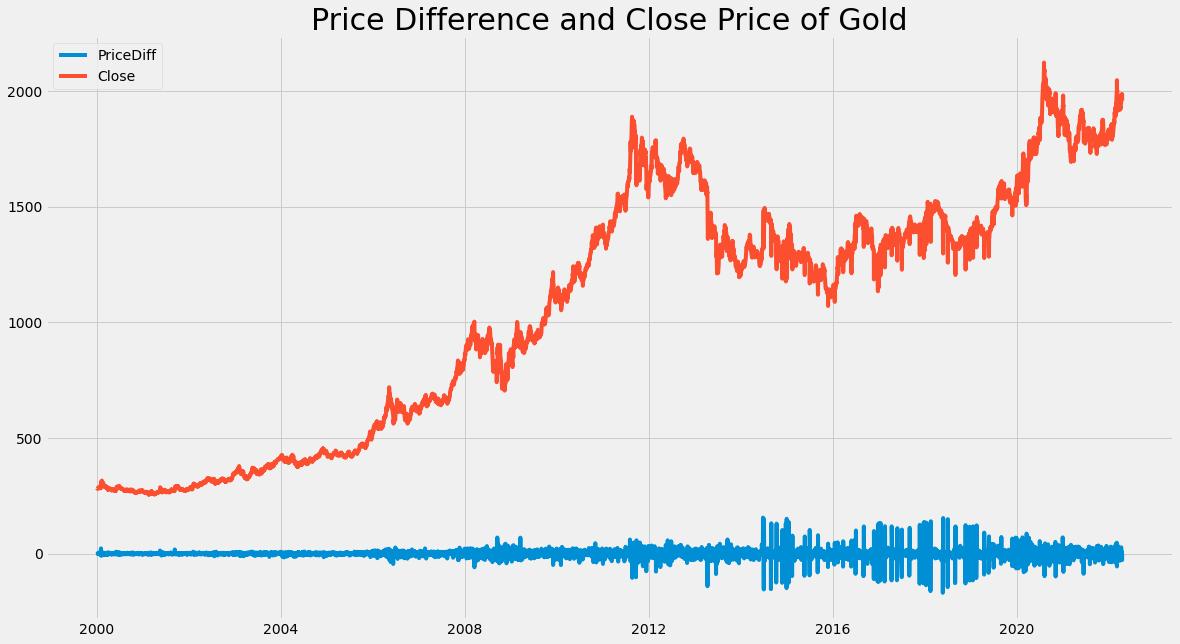

In [13]:
plt.figure(figsize = (18,10))
plt.plot(df['PriceDiff'])
plt.plot(df['Close'])
plt.legend(['PriceDiff','Close'])
plt.title('Price Difference and Close Price of Gold',fontsize = 30)

In [14]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [16]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                   -0.549214
p-value                           0.882050
#Lags Used                        6.000000
Number of Observations Used    5698.000000
Critical Value (1%)              -3.431498
Critical Value (5%)              -2.862047
Critical Value (10%)             -2.567040
dtype: float64
None


In [17]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                  -0.437622
p-value                          0.903625
#Lags Used                       2.000000
Number of Observations Used    265.000000
Critical Value (1%)             -3.455270
Critical Value (5%)             -2.872509
Critical Value (10%)            -2.572615
dtype: float64
None


In [18]:
gold_month = df.resample('M').mean()
df['Returns'] = df['PriceDiff'] / df['Close']
df = df.dropna()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Date'>

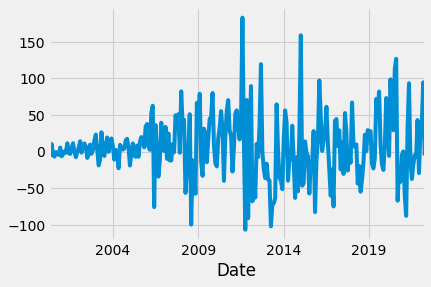

In [19]:
gold_diff = df['Open'].resample('MS').mean() - df['Open'].resample('MS').mean().shift(1)
gold_open_diff = gold_diff.dropna()
gold_open_diff.plot()

<AxesSubplot:xlabel='High', ylabel='PriceDiff'>

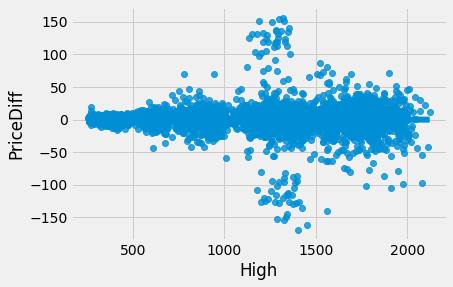

In [20]:
sns.regplot(x = 'High', y = 'PriceDiff', data = df)

# Seasonal Decompose

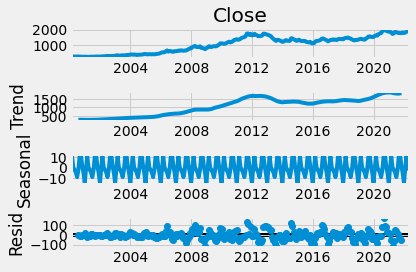

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(gold_month.Close, model='additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

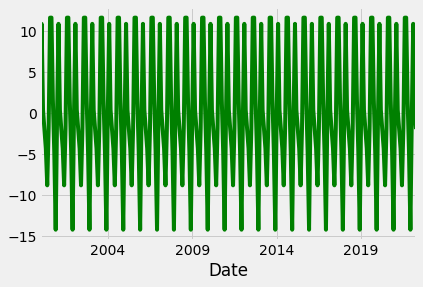

In [22]:
seasonality = decomposition.seasonal
seasonality.plot(color = 'green')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

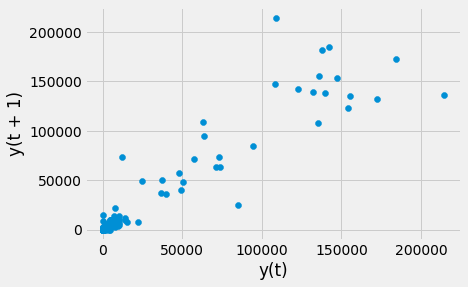

In [23]:
from pandas.plotting import lag_plot
lag_plot(df['Volume'].tail(250))

# Autocorrelation Plots

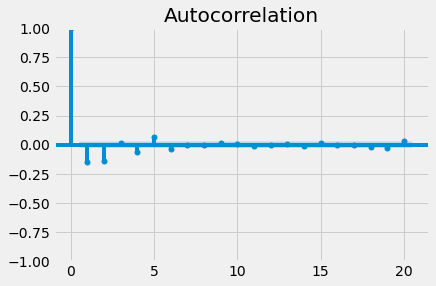

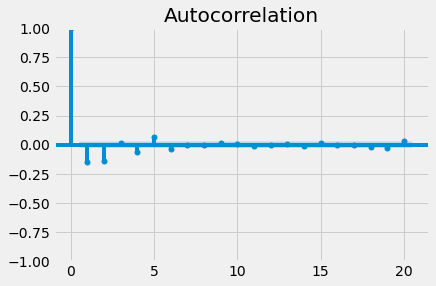

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(df['PriceDiff'], lags =20)

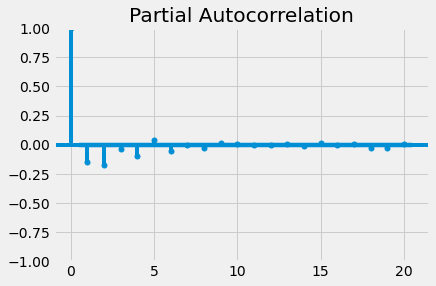

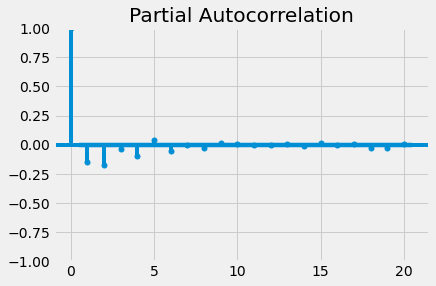

In [25]:
plot_pacf(df['PriceDiff'], lags = 20, method='ols')

# ARIMA 

In [26]:
from statsmodels.tsa.api import ARIMA

model = ARIMA(df['Close'],order =(0,0,0))
result = model.fit()
print(result.aic)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


86933.43062928329


In [27]:
model2 = ARIMA(df['Close'], order=(0,1,0))
result2 = model2.fit()
print(result2.aic)

49469.91457798425


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
model3 = ARIMA(df['Close'], order = (1,0,0))
result3 = model3.fit()
print(result3.aic)

49488.814205154194


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
model4 = ARIMA(df['Close'], order =(1,1,0))
result4 = model4.fit()
print(result4.aic)

49343.541793986275


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
model5 = ARIMA(df['Close'], order = (1,1,1))
result5 = model5.fit()
print(result5.aic)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


49167.9543243856


In [31]:
residuals = pd.DataFrame(result5.resid)
residuals = residuals.iloc[1:]
residuals.describe()

,0
count,5655.000000
mean,0.486004
std,18.682213
min,-167.469693
25%,-4.162701
50%,0.616046
75%,6.203455
max,157.146529


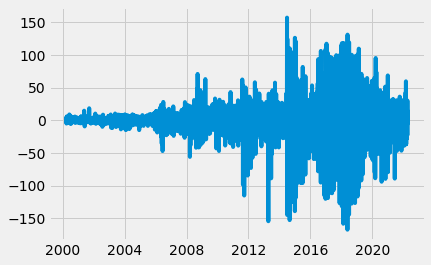

In [32]:
plt.plot(residuals)

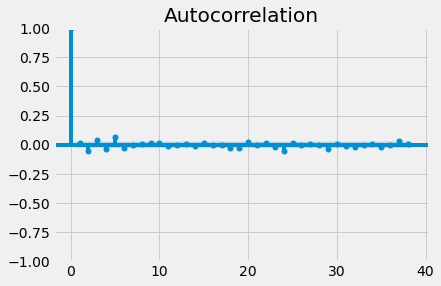

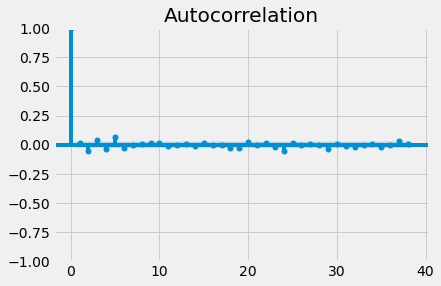

In [33]:
plot_acf(residuals)

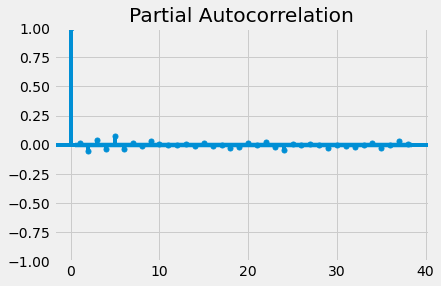

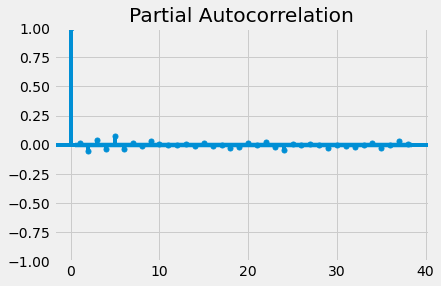

In [34]:
plot_pacf(residuals, method='ols')

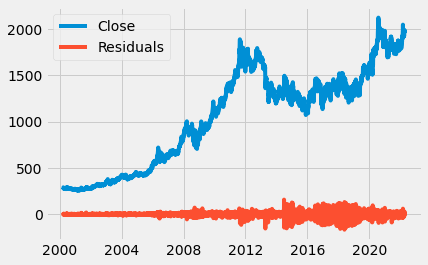

In [35]:
plt.plot(df['Close'])
plt.plot(residuals)
plt.legend(['Close','Residuals'])

# KPSS

In [36]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [37]:
kpss_test(df['High'])

Results of KPSS Test:
Test Statistic           10.673733
p-value                   0.010000
Lags Used                44.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


<AxesSubplot:xlabel='Date'>

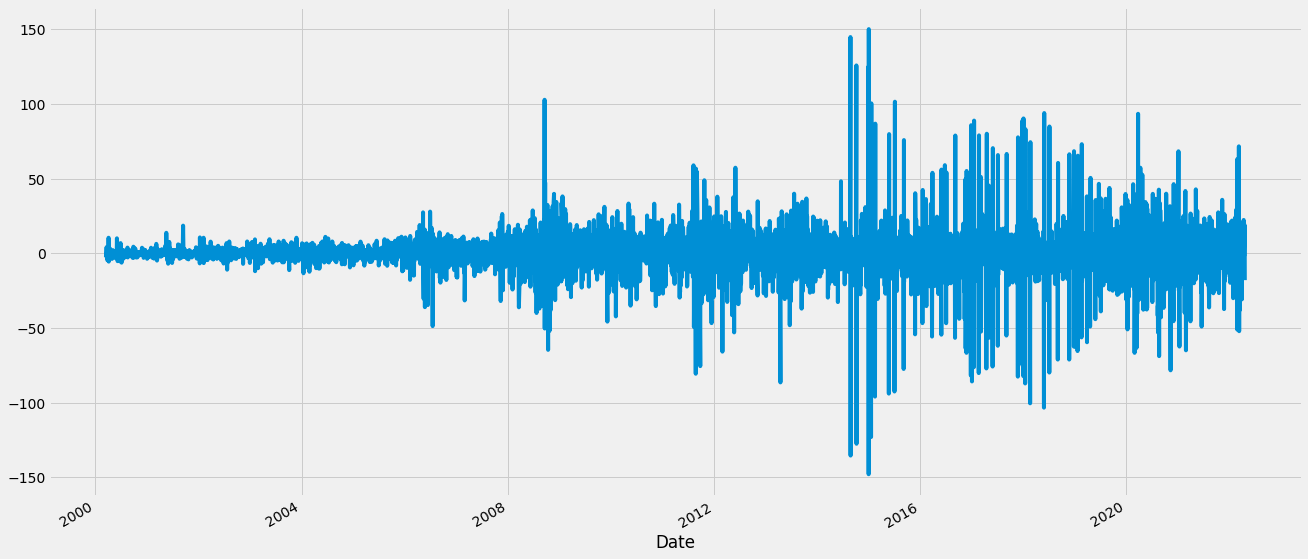

In [38]:
df['High_diff'] = df['High'] - df['High'].shift(1)
df['High_diff'].dropna().plot(figsize = (20,10))

In [39]:
kpss_test(df['High_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.06951
p-value                   0.10000
Lags Used                29.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [40]:
kpss_test(df['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.091457
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [41]:
kpss_test(df['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic           2.190902
p-value                  0.010000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [42]:
adf_test(df['High_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -34.016209
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    5649.000000
Critical Value (1%)              -3.431508
Critical Value (5%)              -2.862052
Critical Value (10%)             -2.567042
dtype: float64


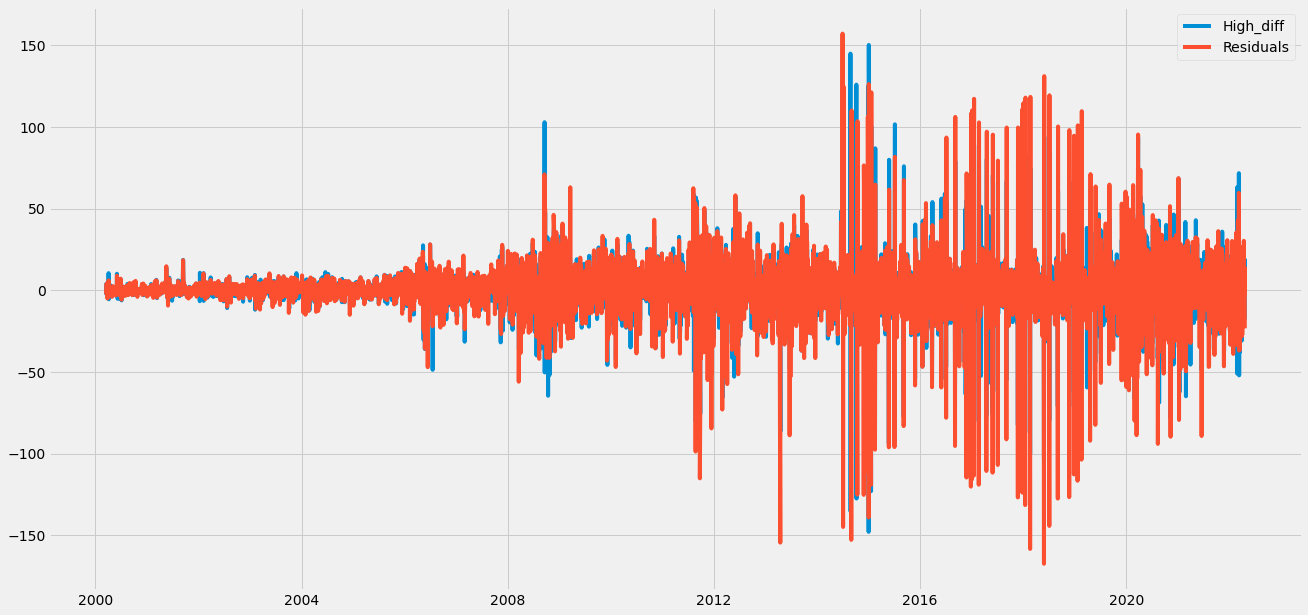

In [43]:
plt.figure(figsize = (20,10))
plt.plot(df['High_diff'])
plt.plot(residuals)
plt.legend(['High_diff','Residuals'])
plt.show()

# PreProcessing and apply RNN + LSTM

In [44]:
train_df = df['High'].iloc[:-4]

X_train = []
y_train = []

for i in range(2, len(train_df)):
  X_train.append(train_df[i-2:i])
  y_train.append(train_df[i])

In [45]:
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

4522

In [46]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential


In [47]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [48]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

2022-04-21 13:33:08.203309: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2022-04-21 13:33:08.484643: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


57/57 - 2s - loss: 682293.8125
Epoch 2/10
57/57 - 0s - loss: 1841.9255
Epoch 3/10
57/57 - 0s - loss: 271.6655
Epoch 4/10
57/57 - 0s - loss: 270.2347
Epoch 5/10
57/57 - 0s - loss: 269.8750
Epoch 6/10
57/57 - 0s - loss: 268.9911
Epoch 7/10
57/57 - 0s - loss: 270.3018
Epoch 8/10
57/57 - 0s - loss: 270.2791
Epoch 9/10
57/57 - 0s - loss: 269.7888
Epoch 10/10
57/57 - 0s - loss: 269.3346


<AxesSubplot:>

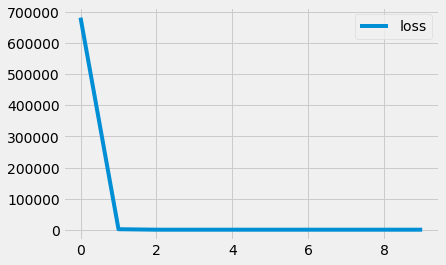

In [49]:
loss = pd.DataFrame(model.history.history)
loss[['loss']].plot()

In [50]:
test_data = train_df[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])




X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)


In [51]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 16.387261718955735
Validation rmse: 20.690053226856016


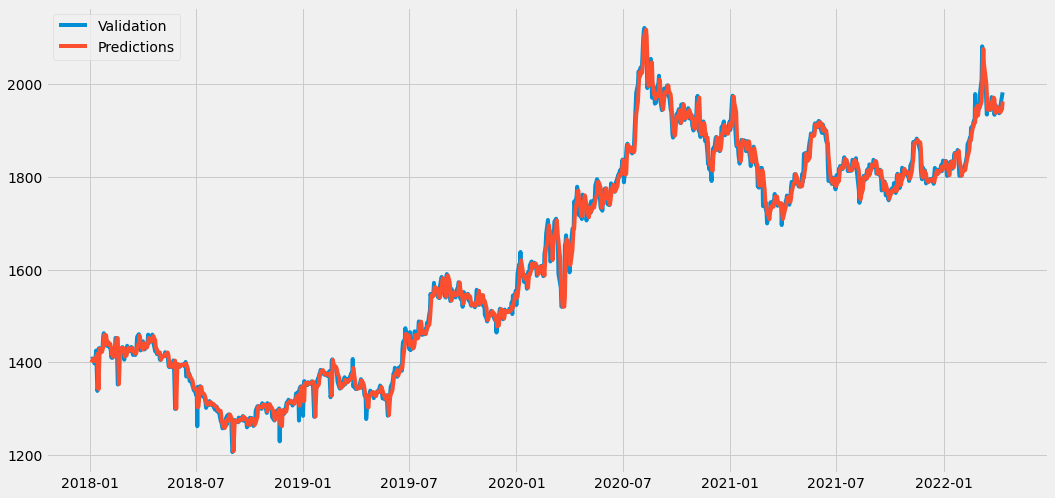

In [52]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [53]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,1130.000000
mean,0.689556
std,20.687715
min,-104.050073
25%,-8.369781
50%,0.243018
75%,10.634332
max,113.542847


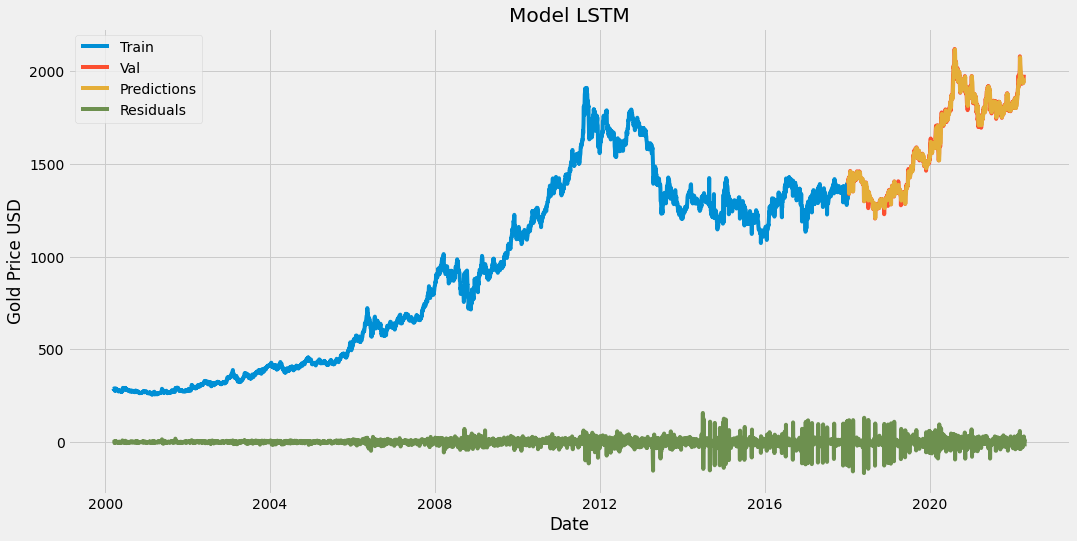

In [54]:
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Gold Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.plot(residuals)
plt.legend(['Train','Val','Predictions','Residuals'])
plt.show()